## Part 4.- Random Networks

Erdös - Renyi

N: number of nodes
p: probability of link between two (randomly selected) nodes

Average number of links: $<L>=p*N*(N-1)/2$

Degree distribution: $<k> = 2 * L/N = p * (N-1)$

### Homework
* Work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.

In [1]:
import networkx as nx
N = 3000
p = .001

In [2]:
ER = nx.erdos_renyi_graph(N, p)

In [3]:
L = p*N*(N-1)/2
print(L)

4498.5


In [4]:
k = p * (N-1)

In [5]:
print(k)

2.999


Regime of the network

In [6]:
def get_regimen(k):
    if k < 0:
        return 'Something is not right'
    if k < 1:
        return 'Subcritical Regimen'
    if k == 1:
        return 'Critical Point'
    if k > 1:
        return 'Supercritical Regimen'

In [7]:
get_regimen(k)

'Supercritical Regimen'

$p_c$ so that the nw is at the critical point ($k = 1, p_c = 1/N$)

In [8]:
p_c = 1/N

In [9]:
print(p_c)

0.0003333333333333333


In [10]:
k_c = p_c * (N-1)
print(k_c)
get_regimen(round(k_c))

0.9996666666666666


'Critical Point'

Number of nodes $N ^{cr}$ so that the network has only one component

In [11]:
import numpy

In [12]:
N_cr = numpy.log(N)

In [13]:
print(N_cr)

8.006367567650246


In [14]:
k_cr = p * (N_cr - 1)
d = numpy.log(N_cr)/numpy.log(k_cr)
print(k_cr)
print(d)

0.007006367567650246
-0.41932353426694996


In [1]:
import matplotlib

# earlier in the program, NOT inside the loop
Dup = {}
v = list()
for n, d in ER.degree:
    # inside your loop to add items:
    if d in Dup:
        ItemNumber = Dup[d]
    else:
        v.append(d)
        Dup[d] = ItemNumber = len(v)-1
print('Degrees: ', sorted(v))

binnedERDeg = numpy.histogram(ER.degree,bins=sorted(v))
ERx = binnedERDeg[0]
ERy = binnedERDeg[1][0:len(binnedERDeg[0])]
matplotlib.pyplot.bar(ERy, ERx)
#TODO

NameError: name 'ER' is not defined

## Paths

Plot a random network with 200 nodes and an average degree of 1.5. (I suggest using networkx.draw and reading the documentation carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).

$ <k> = 2·L/N;  L = <k>·N/2$

In [21]:
n = 200
L = 1.5 * n/2

In [22]:
rdm_graph = nx.dense_gnm_random_graph(n,L)

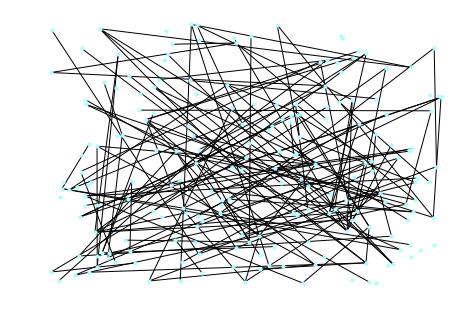

In [23]:
nx.draw_random(rdm_graph, node_size=10, node_color='#affefd')

* Extract the Giant Connected Component, GCC. (Hint. You can use networkx.connected_component_subgraphs)

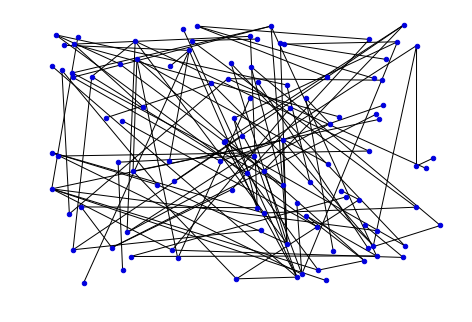

In [86]:
gcc = max(nx.connected_component_subgraphs(rdm_graph),key=len)
nx.draw_random(gcc, node_size=20, node_color='#0000dd')

* Choose a node at random from the GCC. (Hint: You may want to try random.choice.)

In [87]:
import random
nodeList = gcc.nodes()
seq = list()
for node in nodeList:
    seq.append(node)
rdm_node = random.choice(seq)


* Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest networkx.single_source_shortest_path_length)

In [88]:
twoStepsAway = list()
twoStepsAway.clear()
a = nx.single_source_shortest_path_length(gcc, rdm_node , cutoff=2)
for n in a.items():
    if n[1] == 2:
        twoStepsAway.append(n[0])
twoStepsAway

[106, 57, 189]

* Plot the GCC with the following choice of colors. Starting node black ("#000000"). The nodes 2 steps away red ("#ff0000"). All other nodes blue ("#A0CBE2"). Again, I suggest using networkx.draw() and reading the documentation carefully find out how to color individual nodes.

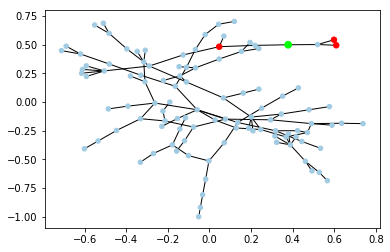

In [91]:
#nx.draw_random(gcc, node_size=20, node_color='#ff0000')

node_colors = ["#ff0000" if n in twoStepsAway
               else '#00ff00' if n == rdm_node
               else "#a0cbe2" for n in gcc.nodes()]
node_sizes = [30 if n in twoStepsAway
               else 45 if n == rdm_node
               else 20 for n in gcc.nodes()]
nx.draw_networkx(gcc, pos=None, arrows=False, with_labels=False,
                 nodelist=gcc.nodes(),
                 node_color=node_colors,
                 node_size=node_sizes
                )
